In [4]:
import os
os.mkdir("./data")

In [5]:
from pathlib import Path

data_path = Path("/kaggle/input/asl-alphabet/")

import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdirectories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  print(dir_path)
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

walk_through_dir(data_path)

/kaggle/input/asl-alphabet
There are 2 directories and 0 images in /kaggle/input/asl-alphabet
There are 1 directories and 0 images in /kaggle/input/asl-alphabet/asl_alphabet_test
There are 0 directories and 28 images in /kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test
There are 1 directories and 0 images in /kaggle/input/asl-alphabet/asl_alphabet_train
There are 29 directories and 0 images in /kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train
There are 0 directories and 3000 images in /kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/N
There are 0 directories and 3000 images in /kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/R
There are 0 directories and 3000 images in /kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/space
There are 0 directories and 3000 images in /kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/B
There are 0 directories and 3000 images in /kaggle/input/asl-alphabet/asl_alphabe

In [27]:
train_dir = data_path / "asl_alphabet_train/asl_alphabet_train"
test_dir = data_path / "asl_alphabet_test/asl_alphabet_test"

Random Image Path: /kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/Y_test.jpg
Image class: asl_alphabet_test
Image height: 200
Image width: 200


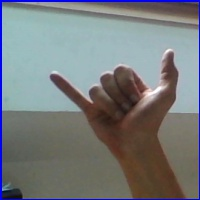

In [7]:
import random
from PIL import Image

RANDOM_SEED = 10

random.seed(RANDOM_SEED)

image_path_list = list(data_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Random Image Path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

In [8]:
import torch
import torch.nn as nn
from torchvision import transforms as T
import torchvision.models as models

In [9]:
# For ResNet50
transforms = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [10]:
type(train_dir)

pathlib.PosixPath

In [11]:
model = models.resnet50(pretrained=True)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 223MB/s] 


In [12]:
from torchvision import datasets

train_data = datasets.ImageFolder(
    root=train_dir,
    transform=transforms,
    target_transform=None
)


In [13]:
train_dataloader = torch.utils.data.DataLoader(
    train_data,
    batch_size=64,
    shuffle=True
)

In [14]:
train_data.classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

In [15]:
class_names = train_data.classes

In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [18]:
model.fc = nn.Sequential(
    nn.Linear(2048, 1000),
    nn.Linear(1000, len(class_names))
)

In [19]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [20]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)

In [21]:
for name, param in model.named_parameters():
  print(name)
  if "layer4.2" in name or "fc" in name:
    param.requires_grad = True
  else:
    param.requires_grad = False

conv1.weight
bn1.weight
bn1.bias
layer1.0.conv1.weight
layer1.0.bn1.weight
layer1.0.bn1.bias
layer1.0.conv2.weight
layer1.0.bn2.weight
layer1.0.bn2.bias
layer1.0.conv3.weight
layer1.0.bn3.weight
layer1.0.bn3.bias
layer1.0.downsample.0.weight
layer1.0.downsample.1.weight
layer1.0.downsample.1.bias
layer1.1.conv1.weight
layer1.1.bn1.weight
layer1.1.bn1.bias
layer1.1.conv2.weight
layer1.1.bn2.weight
layer1.1.bn2.bias
layer1.1.conv3.weight
layer1.1.bn3.weight
layer1.1.bn3.bias
layer1.2.conv1.weight
layer1.2.bn1.weight
layer1.2.bn1.bias
layer1.2.conv2.weight
layer1.2.bn2.weight
layer1.2.bn2.bias
layer1.2.conv3.weight
layer1.2.bn3.weight
layer1.2.bn3.bias
layer2.0.conv1.weight
layer2.0.bn1.weight
layer2.0.bn1.bias
layer2.0.conv2.weight
layer2.0.bn2.weight
layer2.0.bn2.bias
layer2.0.conv3.weight
layer2.0.bn3.weight
layer2.0.bn3.bias
layer2.0.downsample.0.weight
layer2.0.downsample.1.weight
layer2.0.downsample.1.bias
layer2.1.conv1.weight
layer2.1.bn1.weight
layer2.1.bn1.bias
layer2.1.conv2.we

In [22]:
!pip install torchinfo

In [24]:
from torchinfo import summary
summary(model, input_size=(32, 3, 224, 224), col_names=["input_size", "output_size", "num_params", "trainable"])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Trainable
ResNet                                   [32, 3, 224, 224]         [32, 29]                  --                        Partial
├─Conv2d: 1-1                            [32, 3, 224, 224]         [32, 64, 112, 112]        (9,408)                   False
├─BatchNorm2d: 1-2                       [32, 64, 112, 112]        [32, 64, 112, 112]        (128)                     False
├─ReLU: 1-3                              [32, 64, 112, 112]        [32, 64, 112, 112]        --                        --
├─MaxPool2d: 1-4                         [32, 64, 112, 112]        [32, 64, 56, 56]          --                        --
├─Sequential: 1-5                        [32, 64, 56, 56]          [32, 256, 56, 56]         --                        False
│    └─Bottleneck: 2-1                   [32, 64, 56, 56]          [32, 256, 56, 56]         --                        False


In [30]:
image_paths = [os.path.join(test_dir, file) for file in os.listdir(test_dir) if file.endswith(('.jpg', '.png'))]

In [31]:
image_tensors = []
batch_size = 64

for i in range(batch_size):
    image_path = image_paths[i % len(image_paths)]
    img = Image.open(image_path)
    img_tensor = transforms(img)
    image_tensors.append(img_tensor)

image_tensors = torch.stack(image_tensors)
print(image_tensors.shape)

torch.Size([64, 3, 224, 224])


In [32]:
image_tensors = image_tensors.to(dtype=torch.float32, device='cuda')
print(image_tensors.device)

cuda:0


In [33]:
for image, label in train_dataloader:
  print(label.shape)
  break

torch.Size([64])


In [34]:
test_labels = [i%29 for i in range(0, 64)]
test_labels = torch.tensor(test_labels)
print(test_labels.shape)
print(test_labels)

torch.Size([64])
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,  0,  1,  2,  3,  4,  5,  6,
         7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
        25, 26, 27, 28,  0,  1,  2,  3,  4,  5])


In [35]:
for image, label in train_dataloader:
  print(label.dtype)
  break

torch.int64


In [36]:
param_device = next(model.parameters()).device
print(param_device)

cuda:0


In [37]:
test_labels = test_labels.to(dtype=torch.int64, device="cuda")
print(test_labels.device)

cuda:0


In [46]:
model.eval()
with torch.inference_mode():
  test_outputs = model(image_tensors)
  test_loss = loss_fn(test_outputs, test_labels)
  predicted_labels = torch.argmax(torch.softmax(test_outputs, dim=1), dim=1)
  test_acc = (predicted_labels==test_labels).sum().item()/len(test_outputs)
print(test_loss)
print(test_acc)

tensor(3.3952, device='cuda:0')
0.03125


In [47]:
print(test_loss, test_acc)

tensor(3.3952, device='cuda:0') 0.03125


In [48]:
len(train_dataloader)

1360

In [50]:
EPOCHS = 5
from tqdm.auto import tqdm
patience = 3
counter = 0

for epoch in tqdm(range(EPOCHS)):
  total_loss, total_acc = 0, 0
  test_losses = []
  for i, (images, labels) in enumerate(train_dataloader):
    images, labels = images.to(device), labels.to(device)
    model.to(device)
    model.train()

    outputs = model(images)

    loss = loss_fn(outputs, labels)

    total_loss += loss

    predicted_labels = torch.argmax(torch.softmax(outputs, dim=1), dim=1)

    total_acc += (predicted_labels==labels).sum().item()/len(outputs)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_outputs = model(image_tensors)
    test_loss = loss_fn(test_outputs, test_labels)
    predicted_labels = torch.argmax(torch.softmax(test_outputs, dim=1), dim=1)
    test_acc = (predicted_labels==test_labels).sum().item()/len(test_outputs)

    test_losses.append(test_loss)

    print(f"Step: {i+1}/{len(train_dataloader)}: Test Loss: {test_loss:.2f}, Test Accuracy: {test_acc:.2f}")
  print(f"Epoch {epoch+1}: Loss: {total_loss/len(train_dataloader):.2f}, Accuracy: {total_acc/len(train_dataloader):.2f}")
  try:
    if (test_loss[-1] - test_loss[-2]) < 0.0001:
      counter += 1
      if counter >= patience:
        break
  except:
    pass


  0%|          | 0/5 [00:00<?, ?it/s]

Step: 1360/1360: Test Loss: 16.48, Test Accuracy: 0.08
Epoch 1: Loss: 0.14, Accuracy: 0.96
Step: 1360/1360: Test Loss: 20.41, Test Accuracy: 0.08
Epoch 2: Loss: 0.09, Accuracy: 0.97
Step: 1360/1360: Test Loss: 16.05, Test Accuracy: 0.08
Epoch 3: Loss: 0.07, Accuracy: 0.98
Step: 1360/1360: Test Loss: 17.93, Test Accuracy: 0.08
Epoch 4: Loss: 0.06, Accuracy: 0.98
Step: 1360/1360: Test Loss: 22.94, Test Accuracy: 0.09
Epoch 5: Loss: 0.05, Accuracy: 0.98


In [68]:
import pathlib
import matplotlib.pyplot as plt

def predict_and_plot_image(image_path: pathlib.PosixPath, model: torch.nn.Module):
  img = Image.open(image_path)
  original_image = img
  img = transforms(img)
  img = torch.unsqueeze(img, dim=0)
  img = img.to("cuda")
  model = model.to("cuda")
  with torch.no_grad():
    predictions = model(img)

  predictions_label = torch.argmax(torch.softmax(predictions, dim=1), dim=1)
  plt.imshow(original_image)
  plt.title(f"Predicted:{class_names[predictions_label]}")
  plt.axis(False)

In [51]:
PATH = "model_state_dict_path.pth"
torch.save(model.state_dict(), PATH)

In [63]:
image_paths = list(test_dir.glob("*.jpg"))

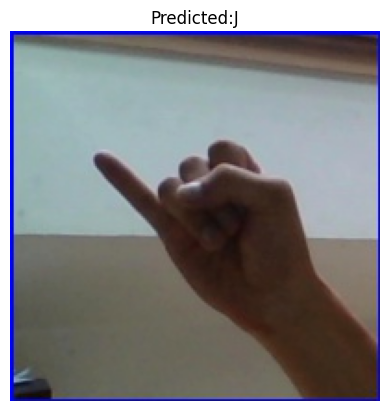

In [76]:
predict_and_plot_image(model=model, image_path=image_paths[26])

In [77]:
PATH = "saved_model.pth"
torch.save(model, PATH)

In [102]:
img = Image.open("/kaggle/input/real-world-test/IMG_20240125_195039.jpg")

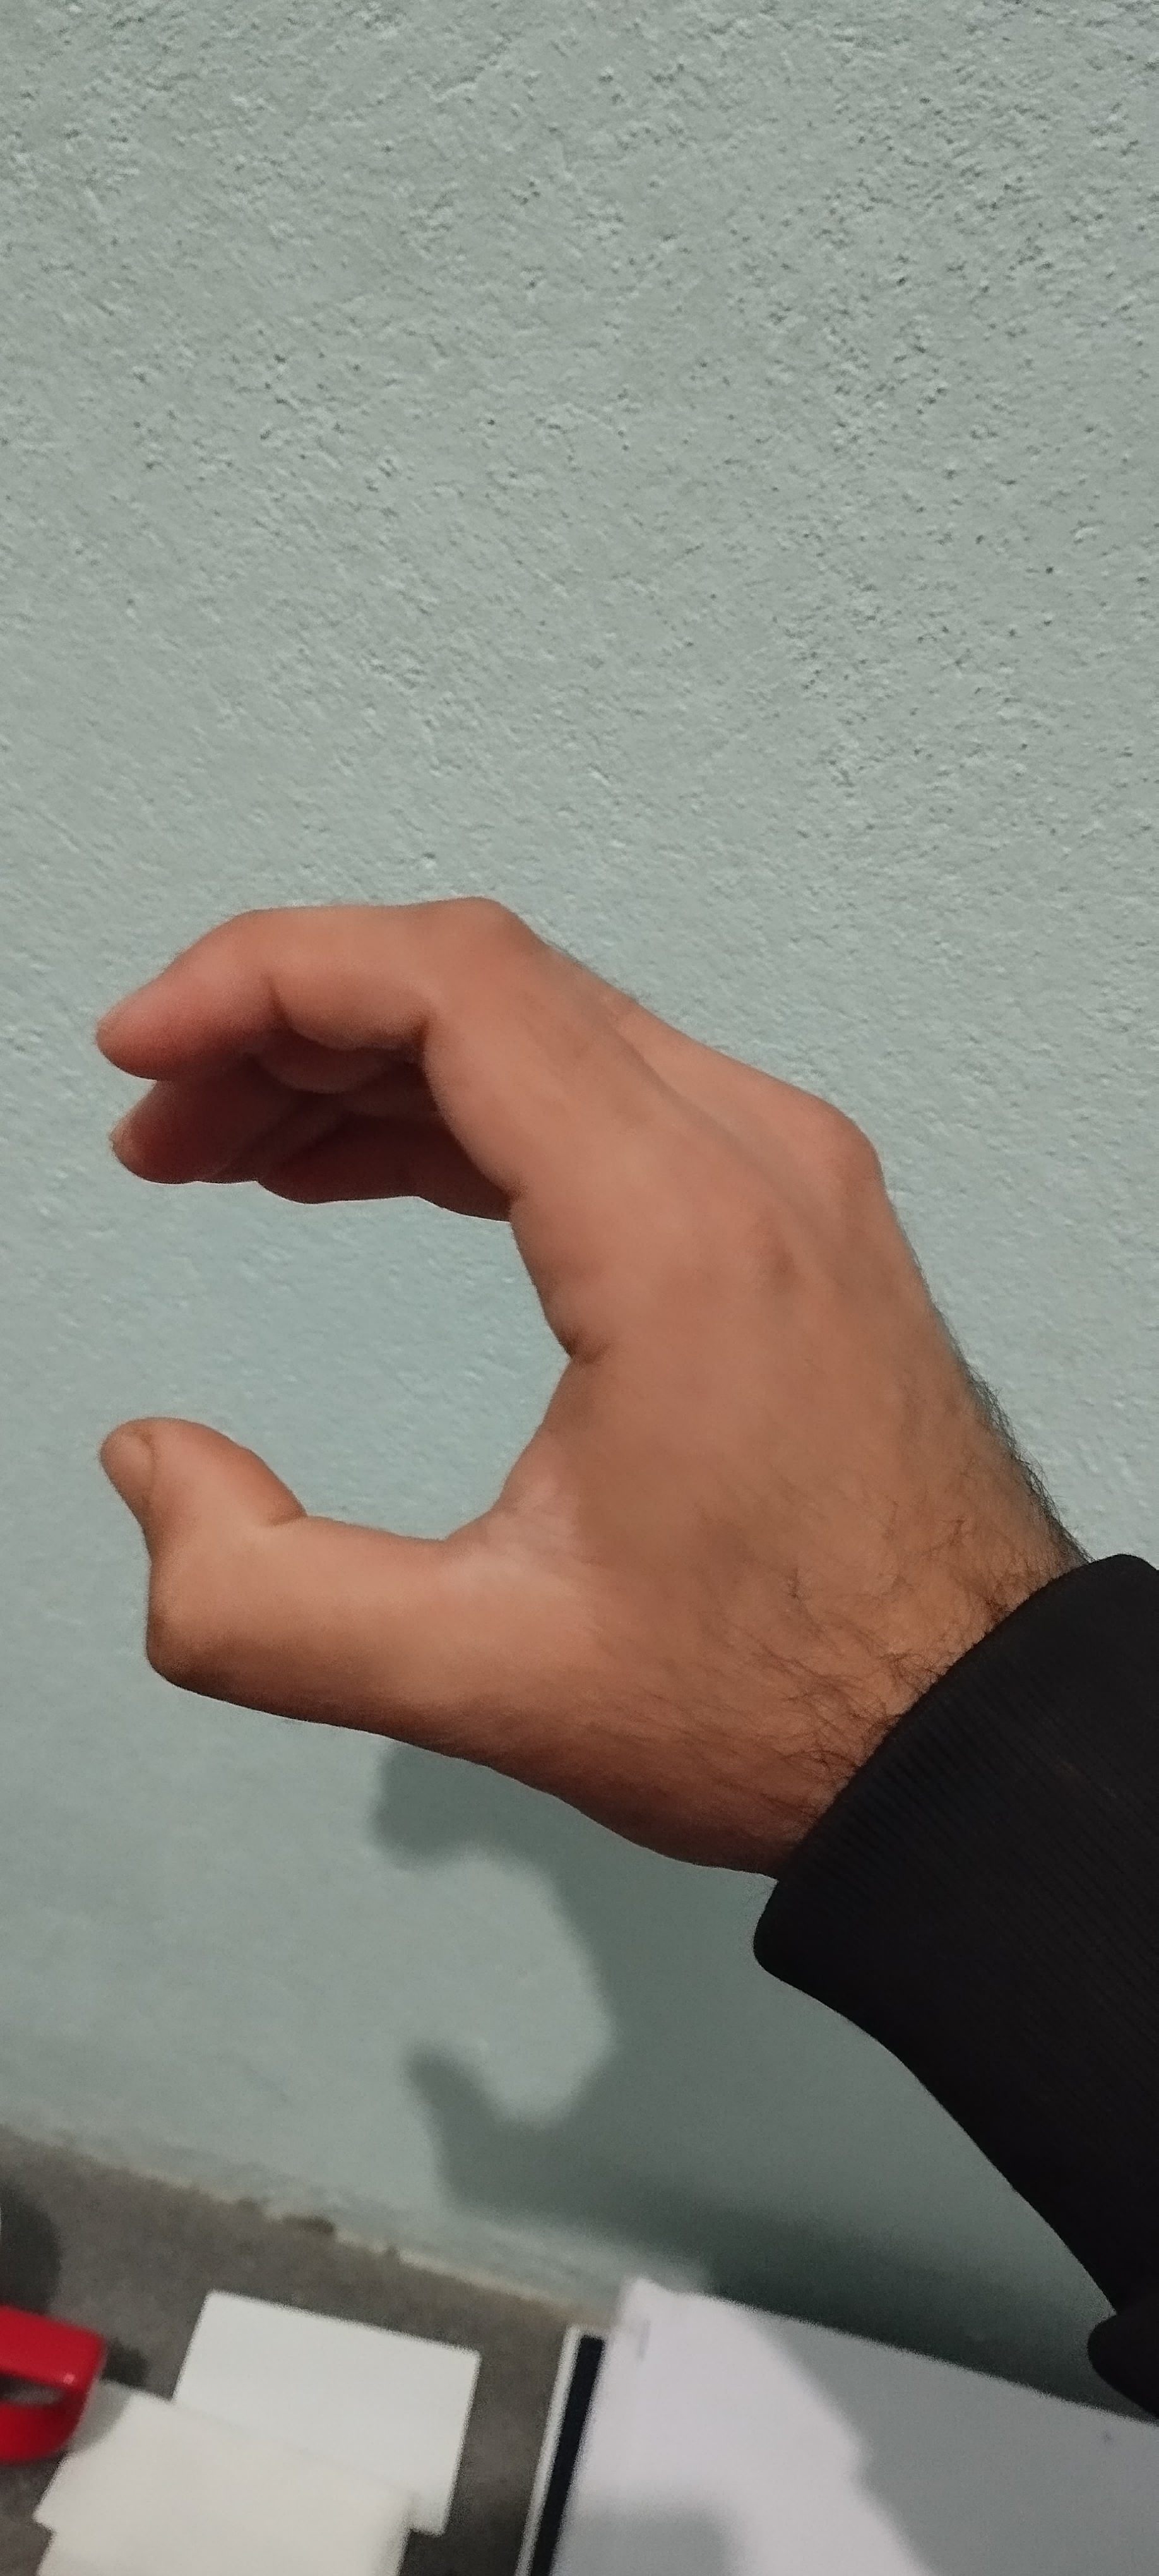

In [103]:
img

In [89]:
img = transforms(img)
img = torch.unsqueeze(img, dim=0)
img.to(device)
img.device

device(type='cpu')

In [92]:
for image, label in train_dataloader:
    print(image.dtype)
    break

torch.float32


In [96]:
img = img.to(dtype=torch.float32, device=device)
img

tensor([[[[ 0.3481,  0.3309,  0.3309,  ...,  0.3138,  0.3823,  0.4337],
          [ 0.2967,  0.2624,  0.2967,  ...,  0.3652,  0.3481,  0.3823],
          [ 0.3823,  0.3652,  0.3481,  ...,  0.3823,  0.3481,  0.3652],
          ...,
          [-0.7479, -0.7137, -0.7308,  ..., -0.1143, -0.1143, -0.0972],
          [-0.7308, -0.7308, -0.7650,  ..., -0.1143, -0.1314, -0.1143],
          [-0.7479, -0.7479, -0.7479,  ..., -0.1143, -0.1143, -0.1143]],

         [[ 0.6604,  0.6429,  0.6429,  ...,  0.6078,  0.6954,  0.7479],
          [ 0.6078,  0.5728,  0.6078,  ...,  0.6604,  0.6429,  0.6779],
          [ 0.6954,  0.6779,  0.6604,  ...,  0.6779,  0.6429,  0.6604],
          ...,
          [-0.7577, -0.7227, -0.7402,  ...,  0.0826,  0.0826,  0.1001],
          [-0.7402, -0.7402, -0.7752,  ...,  0.0476,  0.0476,  0.0651],
          [-0.7577, -0.7577, -0.7577,  ...,  0.0476,  0.0476,  0.0476]],

         [[ 0.7228,  0.7054,  0.7054,  ...,  0.7054,  0.7925,  0.8274],
          [ 0.6705,  0.6356,  

In [97]:
img.device

device(type='cuda', index=0)

In [98]:
with torch.inference_mode():
    predictions = model(img)
    print(predictions)
    prediction_labels = torch.argmax(torch.softmax(predictions, dim=1), dim=1)
    print(prediction_labels)

tensor([[ -3.5684, -13.3769,  16.5413,  -3.6625,  -6.5305,   8.4949,   7.7638,
          -4.1923, -15.3712,  -2.2102, -11.8791,   4.2638,  -2.4353,   3.3365,
           5.4395,  15.0761,  17.3406,  -9.1924,  -5.1349,   3.4059, -13.3707,
          -7.7292, -13.0129,   3.7222,  -3.4524,   8.1401,   9.1252,  -6.5730,
          10.3551]], device='cuda:0')
tensor([16], device='cuda:0')


In [99]:
sorted_values, sorted_indices = torch.sort(predictions)

In [100]:
print(sorted_values, sorted_indices)

tensor([[-15.3712, -13.3769, -13.3707, -13.0129, -11.8791,  -9.1924,  -7.7292,
          -6.5730,  -6.5305,  -5.1349,  -4.1923,  -3.6625,  -3.5684,  -3.4524,
          -2.4353,  -2.2102,   3.3365,   3.4059,   3.7222,   4.2638,   5.4395,
           7.7638,   8.1401,   8.4949,   9.1252,  10.3551,  15.0761,  16.5413,
          17.3406]], device='cuda:0') tensor([[ 8,  1, 20, 22, 10, 17, 21, 27,  4, 18,  7,  3,  0, 24, 12,  9, 13, 19,
         23, 11, 14,  6, 25,  5, 26, 28, 15,  2, 16]], device='cuda:0')


In [101]:
class_names[16]

'Q'

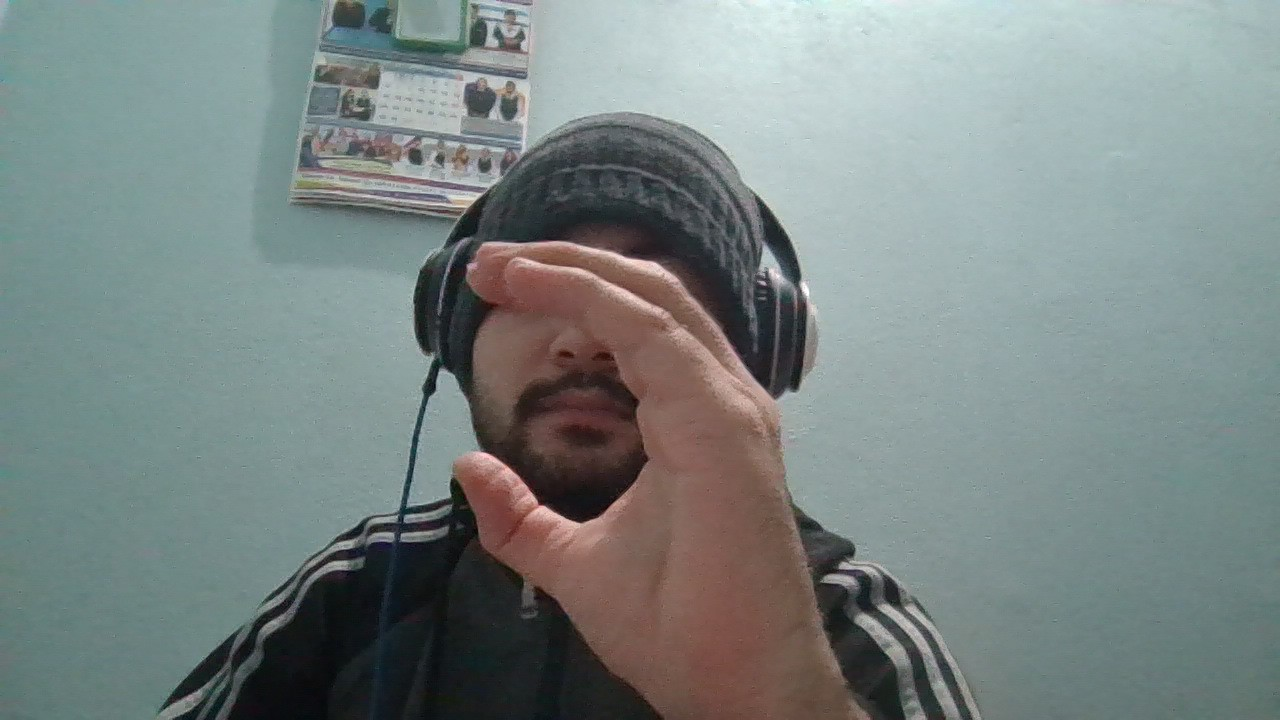

In [104]:
img_2 = Image.open("/kaggle/input/real-image-test/WIN_20240125_20_07_32_Pro.jpg")
img_2

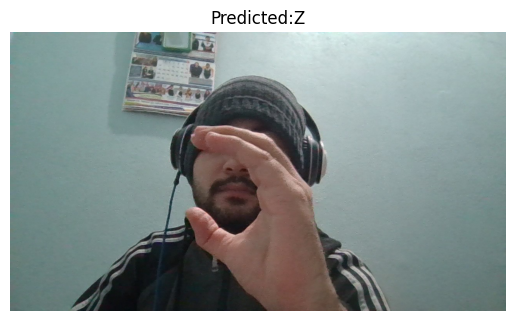

In [106]:
predict_and_plot_image(image_path=Path("/kaggle/input/real-image-test/WIN_20240125_20_07_32_Pro.jpg"),model=model)

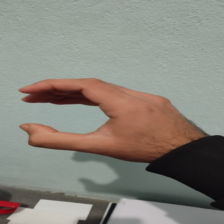

In [108]:
transforms = T.Compose([
    T.Resize((224, 224))
])
img = transforms(img)
img